In [88]:
import pandas as pd
import mysql.connector
import os
import numpy as np
import warnings
warnings.filterwarnings('ignore')


# Datos sucios

In [89]:
patients_batch1 = pd.read_csv("../data/patients_batch1.csv")
patients_batch1

,ehr,birth_date,diagnosis_date,death_date
0,10011773,1959-07-05,2015-04-02,NaN
1,10020495,1953-10-02,2017-12-04,NaN
2,10030299,1966-08-16,2019-06-27,NaN
3,10030824,1953-03-03,2018-09-07,NaN
4,10041592,1959-07-06,2018-11-19,NaN
...,...,...,...,...
7495,77575810,1958-03-21,2014-02-22,NaN
7496,77578551,1948-05-18,2018-07-11,NaN
7497,77579212,1976-02-13,2022-03-22,NaN
7498,77605742,1950-03-16,2015-06-29,NaN


In [90]:
patients_batch2 = pd.read_csv("../data/patients_batch2.csv")
patients_batch2

,ehr,birth_date,diagnosis_date,death_date
0,72992494,13/02/1942,08/05/2018,NaN
1,73002338,22/10/1949,08/09/2018,NaN
2,73008149,04/12/1969,12/04/2018,NaN
3,73012939,18/09/1973,17/04/2014,01/01/2018
4,73019870,07/12/1955,24/05/2018,NaN
...,...,...,...,...
2995,99966287,16/12/1978,02/08/2018,NaN
2996,99981192,10/04/1949,28/10/2017,NaN
2997,99988958,21/01/1966,27/05/2013,NaN
2998,99992350,04/09/1939,17/12/2018,NaN


In [91]:
gynecological = pd.read_excel("../data/gynecological.xlsx")
gynecological

,Unnamed: 0,ehr,pregnancy,birth,caesarean,abort,menarche_age,menopause_age
0,0,10011773,-8.0,0.0,NaN,0.0,NaN,71.0
1,1,10030299,3.0,NaN,0.0,0.0,NaN,NaN
2,2,10030824,0.0,0.0,0.0,NaN,NaN,44.0
3,3,10053435,2.0,NaN,0.0,1.0,21.0,74.0
4,4,10111454,0.0,-6.0,NaN,0.0,16.0,55.0
...,...,...,...,...,...,...,...,...
7681,7681,99948591,9.0,2.0,-4.0,0.0,12.0,47.0
7682,7682,99961100,2.0,2.0,0.0,0.0,19.0,52.0
7683,7683,99981192,3.0,3.0,0.0,-5.0,11.0,NaN
7684,7684,99992350,4.0,3.0,NaN,-6.0,11.0,55.0


In [92]:
histochemistry = pd.read_json("../data/histochemistry.json")
histochemistry

,ehr,er,her2,ki67,pr
0,10011773,0.0,0.0,19.0,NaN
1,10020495,1.0,0.0,9.0,0.0
2,10030299,1.0,NaN,18.0,1.0
3,10030824,1.0,0.0,NaN,1.0
4,10041592,0.0,0.0,65.0,0.0
...,...,...,...,...,...
9995,99966287,1.0,0.0,NaN,0.0
9996,99981192,1.0,0.0,14.0,0.0
9997,99988958,NaN,0.0,67.0,NaN
9998,99992350,0.0,0.0,16.0,0.0


In [93]:
if os.path.exists('../data/tumor.xlsx'):
    tumor = pd.read_excel("../data/tumor.xlsx")
else:
    config = {'host': "localhost",
              'port': 3306,
              'user': "cancer_mama_user",
              'passwd': "cancer_mama_password",
              'db': "cancer_mama"}
    conn = mysql.connector.connect(**config)
    cursor = conn.cursor()

    sql_columns_names = "SHOW COLUMNS from tumor;"
    sql_tumor = "SELECT * FROM tumor"

    cursor.execute(sql_tumor)
    tumor = pd.DataFrame(cursor.fetchall())

    cursor.execute(sql_columns_names)
    columns_names = pd.DataFrame(cursor.fetchall())

    cursor.close()
    conn.close()

    tumor = tumor.set_axis(columns_names[0], axis=1)
    tumor.to_excel("../data/tumor.xlsx")
tumor

,Unnamed: 0,ehr,n_tumor,t_category,n_category,m_category,t_category_after_neoadj,n_category_after_neoadj,m_category_after_neoadj,stage_diagnosis,stage_after_neo,grade,ductal,lobular,neoadjuvant
0,0,10011773,1,IS,0,0,NaN,NaN,NaN,0,NaN,1,NaN,NaN,no
1,1,10020495,1,1,0,0,NaN,NaN,NaN,IA,NaN,2,1.0,NaN,no
2,2,10020495,2,3,1,0,2,0.0,NaN,IA,NaN,2,1.0,NaN,yes
3,3,10030299,1,1,0,0,NaN,NaN,NaN,IA,NaN,1,1.0,NaN,no
4,4,10030824,1,2,1,0,2,2.0,0.0,IIIA,IIIA,3,NaN,1.0,yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11162,11162,99966287,1,1,1,0,1,0.0,0.0,IB,IIA,3,1.0,NaN,yes
11163,11163,99981192,1,1,0,0,NaN,NaN,NaN,IA,NaN,2,NaN,NaN,no
11164,11164,99988958,1,0,2,0,1,1.0,0.0,IIIA,IIA,1,1.0,NaN,yes
11165,11165,99992350,1,2,0,0,3,2.0,0.0,IIA,IIIA,2,1.0,NaN,yes


# Preprocesamiento

## Patients

In [94]:
len(patients_batch1.ehr.unique())

7500

In [95]:
len(patients_batch2.ehr.unique())

3000

Vemos si hay algún paciente común en ambos batchs de datos de pacientes

In [96]:
any(patients_batch1['ehr'].isin(patients_batch2['ehr']))

True

Obtenemos los ids de los pacientes que aparecen en ambos 

In [97]:
elementos_comunes = set(patients_batch1['ehr']).intersection(set(patients_batch2['ehr']))
print(f"El número total de pacientes comunes son: {len(elementos_comunes)}")

El número total de pacientes comunes son: 500


Vemos ahora si estos pacientes que aparecen en ambos documentos tienen valores distintos en cada uno de los documentos

In [98]:
pacientes_comunes_batch1 = patients_batch1[patients_batch1['ehr'].isin(elementos_comunes)]
pacientes_comunes_batch1

,ehr,birth_date,diagnosis_date,death_date
7000,72992494,1942-02-13,2018-05-08,NaN
7001,73002338,1949-10-22,2018-09-08,NaN
7002,73008149,1969-12-04,2018-04-12,NaN
7003,73012939,1973-09-18,2014-04-17,2018-01-01
7004,73019870,1955-12-07,2018-05-24,NaN
...,...,...,...,...
7495,77575810,1958-03-21,2014-02-22,NaN
7496,77578551,1948-05-18,2018-07-11,NaN
7497,77579212,1976-02-13,2022-03-22,NaN
7498,77605742,1950-03-16,2015-06-29,NaN


In [99]:
pacientes_comunes_batch2 = patients_batch2[patients_batch2['ehr'].isin(elementos_comunes)]
pacientes_comunes_batch2

,ehr,birth_date,diagnosis_date,death_date
0,72992494,13/02/1942,08/05/2018,NaN
1,73002338,22/10/1949,08/09/2018,NaN
2,73008149,04/12/1969,12/04/2018,NaN
3,73012939,18/09/1973,17/04/2014,01/01/2018
4,73019870,07/12/1955,24/05/2018,NaN
...,...,...,...,...
495,77575810,21/03/1958,22/02/2014,NaN
496,77578551,18/05/1948,11/07/2018,NaN
497,77579212,13/02/1976,22/03/2022,NaN
498,77605742,16/03/1950,29/06/2015,NaN


Parece ser que los valores sí que son iguales, pero cada documento usa un formato distinto para las fechas. Vamos a ponerlo todo en el formato del primer documento, que es el formato por defecto de datetime: aaaa-mm-dd

In [100]:
pacientes_comunes_batch2['birth_date'] = pd.to_datetime(pacientes_comunes_batch2['birth_date'], format='%d/%m/%Y')
pacientes_comunes_batch2['death_date'] = pd.to_datetime(pacientes_comunes_batch2['death_date'], format='%d/%m/%Y')
pacientes_comunes_batch2['diagnosis_date'] = pd.to_datetime(pacientes_comunes_batch2['diagnosis_date'], format='%d/%m/%Y')

pacientes_comunes_batch1['birth_date'] = pd.to_datetime(pacientes_comunes_batch1['birth_date'])
pacientes_comunes_batch1['diagnosis_date'] = pd.to_datetime(pacientes_comunes_batch1['diagnosis_date'])
pacientes_comunes_batch1['death_date'] = pd.to_datetime(pacientes_comunes_batch1['death_date'])

pacientes_comunes_batch2

,ehr,birth_date,diagnosis_date,death_date
0,72992494,1942-02-13,2018-05-08,NaT
1,73002338,1949-10-22,2018-09-08,NaT
2,73008149,1969-12-04,2018-04-12,NaT
3,73012939,1973-09-18,2014-04-17,2018-01-01
4,73019870,1955-12-07,2018-05-24,NaT
...,...,...,...,...
495,77575810,1958-03-21,2014-02-22,NaT
496,77578551,1948-05-18,2018-07-11,NaT
497,77579212,1976-02-13,2022-03-22,NaT
498,77605742,1950-03-16,2015-06-29,NaT


In [101]:
pacientes_comunes_batch1['birth_date'] = pd.to_datetime(pacientes_comunes_batch1['birth_date'])
pacientes_comunes_batch1['diagnosis_date'] = pd.to_datetime(pacientes_comunes_batch1['diagnosis_date'])
pacientes_comunes_batch1['death_date'] = pd.to_datetime(pacientes_comunes_batch1['death_date'])

In [102]:
pacientes_comunes_batch1.reset_index(drop=True, inplace=True)

In [103]:
pacientes_comunes_batch2.equals(pacientes_comunes_batch1)

True

Vemos que todos los valores de los pacientes que aparecen en los dos documentos son exactamente iguales

In [104]:
patients_batch1

,ehr,birth_date,diagnosis_date,death_date
0,10011773,1959-07-05,2015-04-02,NaN
1,10020495,1953-10-02,2017-12-04,NaN
2,10030299,1966-08-16,2019-06-27,NaN
3,10030824,1953-03-03,2018-09-07,NaN
4,10041592,1959-07-06,2018-11-19,NaN
...,...,...,...,...
7495,77575810,1958-03-21,2014-02-22,NaN
7496,77578551,1948-05-18,2018-07-11,NaN
7497,77579212,1976-02-13,2022-03-22,NaN
7498,77605742,1950-03-16,2015-06-29,NaN


In [105]:
patients_batch2

,ehr,birth_date,diagnosis_date,death_date
0,72992494,13/02/1942,08/05/2018,NaN
1,73002338,22/10/1949,08/09/2018,NaN
2,73008149,04/12/1969,12/04/2018,NaN
3,73012939,18/09/1973,17/04/2014,01/01/2018
4,73019870,07/12/1955,24/05/2018,NaN
...,...,...,...,...
2995,99966287,16/12/1978,02/08/2018,NaN
2996,99981192,10/04/1949,28/10/2017,NaN
2997,99988958,21/01/1966,27/05/2013,NaN
2998,99992350,04/09/1939,17/12/2018,NaN


In [106]:
patients_batch2['birth_date'] = pd.to_datetime(patients_batch2['birth_date'], format='%d/%m/%Y')
patients_batch2['diagnosis_date'] = pd.to_datetime(patients_batch2['diagnosis_date'], format='%d/%m/%Y')
patients_batch2['birth_date'] = pd.to_datetime(patients_batch2['birth_date'], format='%d/%m/%Y')

patients_batch1['birth_date'] = pd.to_datetime(patients_batch1['birth_date'])
patients_batch1['diagnosis_date'] = pd.to_datetime(patients_batch1['diagnosis_date'])
patients_batch1['death_date'] = pd.to_datetime(patients_batch1['death_date'])

In [107]:
patients_batch1_sin_comunes = patients_batch1[~patients_batch1["ehr"].isin(pacientes_comunes_batch1["ehr"])]
patients_batch1_sin_comunes

,ehr,birth_date,diagnosis_date,death_date
0,10011773,1959-07-05,2015-04-02,NaT
1,10020495,1953-10-02,2017-12-04,NaT
2,10030299,1966-08-16,2019-06-27,NaT
3,10030824,1953-03-03,2018-09-07,NaT
4,10041592,1959-07-06,2018-11-19,NaT
...,...,...,...,...
6995,72964107,1959-01-01,2019-12-18,NaT
6996,72975846,1959-07-02,2017-09-01,NaT
6997,72976171,1972-12-01,2018-06-09,NaT
6998,72983987,1962-08-28,2013-07-03,2019-01-25


In [108]:
patients = pd.concat([patients_batch1_sin_comunes, patients_batch2], ignore_index=True)
patients

,ehr,birth_date,diagnosis_date,death_date
0,10011773,1959-07-05,2015-04-02,NaN
1,10020495,1953-10-02,2017-12-04,NaN
2,10030299,1966-08-16,2019-06-27,NaN
3,10030824,1953-03-03,2018-09-07,NaN
4,10041592,1959-07-06,2018-11-19,NaN
...,...,...,...,...
9995,99966287,1978-12-16,2018-08-02,NaN
9996,99981192,1949-04-10,2017-10-28,NaN
9997,99988958,1966-01-21,2013-05-27,NaN
9998,99992350,1939-09-04,2018-12-17,NaN


In [109]:
len(patients.ehr.unique())

10000

Ahora deberemos sustituir las columnas de fechas por unas numericas. De esta forma 'birth_date' sera 'age' (edad actual del paciente), 'diagnosis_date' sera 'diagnosis_age' (edad a la que fue diagnsoticado).

In [110]:
from datetime import datetime
patients['age'] = datetime.now().year - patients['birth_date'].dt.year
patients['diagnosis_age'] = patients['diagnosis_date'].dt.year - patients['birth_date'].dt.year


Por ultimo, hay muchos valores nulos en la variable 'death_date'. Esto sinifica que la mayoria de los pacientes no han muerto. Prodedemos a cambiar esta variable por una binaria que indique tan solo si el paciente ha fallecido o no.

In [111]:
patients.isnull().sum()

ehr                  0
birth_date           0
diagnosis_date       0
death_date        8865
age                  0
diagnosis_age        0
dtype: int64

In [112]:
patients['dead'] = patients['death_date'].notnull().astype(int)
patients.drop(columns=['death_date', 'birth_date', 'diagnosis_date'], inplace=True)

In [113]:
patients

,ehr,age,diagnosis_age,dead
0,10011773,65,56,0
1,10020495,71,64,0
2,10030299,58,53,0
3,10030824,71,65,0
4,10041592,65,59,0
...,...,...,...,...
9995,99966287,46,40,0
9996,99981192,75,68,0
9997,99988958,58,47,0
9998,99992350,85,79,0


## Histochemistry

In [114]:
histochemistry

,ehr,er,her2,ki67,pr
0,10011773,0.0,0.0,19.0,NaN
1,10020495,1.0,0.0,9.0,0.0
2,10030299,1.0,NaN,18.0,1.0
3,10030824,1.0,0.0,NaN,1.0
4,10041592,0.0,0.0,65.0,0.0
...,...,...,...,...,...
9995,99966287,1.0,0.0,NaN,0.0
9996,99981192,1.0,0.0,14.0,0.0
9997,99988958,NaN,0.0,67.0,NaN
9998,99992350,0.0,0.0,16.0,0.0


In [115]:
histochemistry.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   ehr     10000 non-null  int64  
 1   er      9042 non-null   float64
 2   her2    9006 non-null   float64
 3   ki67    9032 non-null   float64
 4   pr      9018 non-null   float64
dtypes: float64(4), int64(1)
memory usage: 390.8 KB


Todos los valores estan dentro de los rangos posibles salvo la variable 'ki67' que al ser un valor porcentual no podria sobrepasar el valor 100, y sin embargo vemos que su valor maximo es 137.

In [116]:
histochemistry.describe()

,ehr,er,her2,ki67,pr
count,1.000000e+04,9042.000000,9006.000000,9032.000000,9018.000000
mean,5.494471e+07,0.662906,0.158894,21.315766,0.665669
std,2.609028e+07,0.472743,0.365598,22.242693,0.471782
min,1.001177e+07,0.000000,0.000000,-57.000000,0.000000
25%,3.214794e+07,0.000000,0.000000,12.000000,0.000000
50%,5.480334e+07,1.000000,0.000000,18.000000,1.000000
75%,7.761323e+07,1.000000,0.000000,28.000000,1.000000
max,9.999442e+07,1.000000,1.000000,137.000000,1.000000


En todas la columnas nos encontramos con valores nulos.

In [117]:
histochemistry.isnull().sum()

ehr       0
er      958
her2    994
ki67    968
pr      982
dtype: int64

No hay ninguna fila completamente vacia

In [118]:
filas_nulas = histochemistry[histochemistry.columns.drop('ehr')].isnull().all(axis=1)
filas_nulas[filas_nulas].index.tolist()

[]

Sin embargo hay 488 filas con 2 o mas valores nulos. Procedemos a eliminarlas puesto que este df tiene tan solo 4 variables y si faltan la mitad o mas consideramos que no aporta informacion sufieciente. Ademas tan solo hay 488 filas a las que les sucede, que corresponden tan solo a un 5% del dataset. 

In [119]:
filas_nulas = histochemistry[histochemistry.columns.drop('ehr')].isnull().sum(axis=1) >=2
len(filas_nulas[filas_nulas].index.tolist())

488

In [120]:
histochemistry.drop(filas_nulas[filas_nulas].index.tolist(), inplace=True)

Sigue habiendo valores nulos, pero al menos ahora sabemos que en cada fila como mucho hay tan solo 1 valor nulo

In [121]:
histochemistry.isnull().sum()

ehr       0
er      699
her2    757
ki67    702
pr      725
dtype: int64

In [122]:
len(histochemistry.ehr.unique())

9512

Coinciden todos los ids con los de patients

In [123]:
elementos_comunes = set(histochemistry['ehr']).intersection(set(patients['ehr']))
len(elementos_comunes)

9512

Como comparten todos los ids simplemente añadimos la informacion del nuevo df al de 'patients'

In [124]:
patients = pd.merge(patients, histochemistry, on='ehr')

In [125]:
patients

,ehr,age,diagnosis_age,dead,er,her2,ki67,pr
0,10011773,65,56,0,0.0,0.0,19.0,NaN
1,10020495,71,64,0,1.0,0.0,9.0,0.0
2,10030299,58,53,0,1.0,NaN,18.0,1.0
3,10030824,71,65,0,1.0,0.0,NaN,1.0
4,10041592,65,59,0,0.0,0.0,65.0,0.0
...,...,...,...,...,...,...,...,...
9507,99963879,65,62,0,1.0,0.0,18.0,1.0
9508,99966287,46,40,0,1.0,0.0,NaN,0.0
9509,99981192,75,68,0,1.0,0.0,14.0,0.0
9510,99992350,85,79,0,0.0,0.0,16.0,0.0


## Gynecological

In [126]:
gynecological

,Unnamed: 0,ehr,pregnancy,birth,caesarean,abort,menarche_age,menopause_age
0,0,10011773,-8.0,0.0,NaN,0.0,NaN,71.0
1,1,10030299,3.0,NaN,0.0,0.0,NaN,NaN
2,2,10030824,0.0,0.0,0.0,NaN,NaN,44.0
3,3,10053435,2.0,NaN,0.0,1.0,21.0,74.0
4,4,10111454,0.0,-6.0,NaN,0.0,16.0,55.0
...,...,...,...,...,...,...,...,...
7681,7681,99948591,9.0,2.0,-4.0,0.0,12.0,47.0
7682,7682,99961100,2.0,2.0,0.0,0.0,19.0,52.0
7683,7683,99981192,3.0,3.0,0.0,-5.0,11.0,NaN
7684,7684,99992350,4.0,3.0,NaN,-6.0,11.0,55.0


In [127]:
gynecological.drop(columns=['Unnamed: 0'], inplace=True)

In [128]:
gynecological.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7686 entries, 0 to 7685
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   ehr            7686 non-null   int64  
 1   pregnancy      6413 non-null   float64
 2   birth          6417 non-null   float64
 3   caesarean      6131 non-null   float64
 4   abort          6235 non-null   float64
 5   menarche_age   4901 non-null   float64
 6   menopause_age  4486 non-null   float64
dtypes: float64(6), int64(1)
memory usage: 420.5 KB


Observamos como hay valores fuera de rango. Para las variables 'pregnancy', 'birth', 'caesarean', 'abort' los valores minimos son negativos, y los maximos dudamos que puedan ser reales. Para la variable 'menopause_age' el valor maximo es 145, lo cual es imposible. Habra que tratar estos valores asi como deberemos asegurarnos que el valor de pregnancy = birth + caesarean + abort.

In [129]:
gynecological.describe()

,ehr,pregnancy,birth,caesarean,abort,menarche_age,menopause_age
count,7.686000e+03,6413.000000,6417.000000,6131.000000,6235.000000,4901.000000,4486.000000
mean,5.505640e+07,2.078590,1.673991,0.029848,0.259984,12.736584,50.263041
std,2.621591e+07,3.052473,3.006228,2.677790,2.691482,3.062710,17.196300
min,1.001177e+07,-10.000000,-10.000000,-11.000000,-12.000000,0.000000,2.000000
25%,3.202165e+07,1.000000,0.000000,0.000000,0.000000,11.000000,44.000000
50%,5.503108e+07,2.000000,2.000000,0.000000,0.000000,13.000000,49.000000
75%,7.794185e+07,3.000000,3.000000,0.000000,1.000000,14.000000,53.000000
max,9.999442e+07,14.000000,15.000000,12.000000,12.000000,26.000000,145.000000


Hay una gran cantidad de nulos, sobre todo para la variable 'menopause_age', siendo el 41.6% de los valores nulos. Teniendo esto en cuenta procederemos a no considerar esta variable. 

In [130]:
gynecological.isnull().sum()

ehr                 0
pregnancy        1273
birth            1269
caesarean        1555
abort            1451
menarche_age     2785
menopause_age    3200
dtype: int64

In [131]:
gynecological.drop(columns='menopause_age', inplace=True)

Sin contar la variable identificadora 'ehr' tenemos tan solo 5 variables explicativas en este dataset. Porcedemos a eliminar aquellas filas que tengan tan solo 1 valor no nulo. Podriamos optar a eliminar aquellas con tan solo 2 valores no nulos, pero primero debremos estudiar si podemos imputar nosotros esos valores.

In [132]:
filas_nulas = gynecological[gynecological.columns.drop('ehr')].isnull().sum(axis=1) >=4
len(filas_nulas[filas_nulas].index.tolist())

30

In [133]:
gynecological.drop(filas_nulas[filas_nulas].index.tolist(), inplace=True)

In [134]:
len(gynecological.ehr.unique())


7656

In [135]:
elementos_comunes = set(gynecological['ehr']).intersection(set(patients['ehr']))
len(elementos_comunes)

7280

In [136]:
gynecological_patients = pd.merge(gynecological, patients, on='ehr')

In [137]:
gynecological_patients

,ehr,pregnancy,birth,caesarean,abort,menarche_age,age,diagnosis_age,dead,er,her2,ki67,pr
0,10011773,-8.0,0.0,NaN,0.0,NaN,65,56,0,0.0,0.0,19.0,NaN
1,10030299,3.0,NaN,0.0,0.0,NaN,58,53,0,1.0,NaN,18.0,1.0
2,10030824,0.0,0.0,0.0,NaN,NaN,71,65,0,1.0,0.0,NaN,1.0
3,10053435,2.0,NaN,0.0,1.0,21.0,67,60,0,1.0,0.0,NaN,1.0
4,10111454,0.0,-6.0,NaN,0.0,16.0,63,56,0,1.0,0.0,72.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
7275,99948591,9.0,2.0,-4.0,0.0,12.0,69,67,0,1.0,0.0,12.0,1.0
7276,99961100,2.0,2.0,0.0,0.0,19.0,54,48,0,1.0,0.0,21.0,1.0
7277,99981192,3.0,3.0,0.0,-5.0,11.0,75,68,0,1.0,0.0,14.0,0.0
7278,99992350,4.0,3.0,NaN,-6.0,11.0,85,79,0,0.0,0.0,16.0,0.0


## Tumor

In [138]:
tumor

,Unnamed: 0,ehr,n_tumor,t_category,n_category,m_category,t_category_after_neoadj,n_category_after_neoadj,m_category_after_neoadj,stage_diagnosis,stage_after_neo,grade,ductal,lobular,neoadjuvant
0,0,10011773,1,IS,0,0,NaN,NaN,NaN,0,NaN,1,NaN,NaN,no
1,1,10020495,1,1,0,0,NaN,NaN,NaN,IA,NaN,2,1.0,NaN,no
2,2,10020495,2,3,1,0,2,0.0,NaN,IA,NaN,2,1.0,NaN,yes
3,3,10030299,1,1,0,0,NaN,NaN,NaN,IA,NaN,1,1.0,NaN,no
4,4,10030824,1,2,1,0,2,2.0,0.0,IIIA,IIIA,3,NaN,1.0,yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11162,11162,99966287,1,1,1,0,1,0.0,0.0,IB,IIA,3,1.0,NaN,yes
11163,11163,99981192,1,1,0,0,NaN,NaN,NaN,IA,NaN,2,NaN,NaN,no
11164,11164,99988958,1,0,2,0,1,1.0,0.0,IIIA,IIA,1,1.0,NaN,yes
11165,11165,99992350,1,2,0,0,3,2.0,0.0,IIA,IIIA,2,1.0,NaN,yes


In [139]:
tumor.drop(columns=['Unnamed: 0'], inplace=True)

hay ids que se repiten. una persona puede tener varios tumores

In [140]:
len(tumor.ehr.unique())

9971

In [141]:
elementos_comunes = set(tumor['ehr']).intersection(set(gynecological_patients['ehr']))
len(elementos_comunes)

7262

Tiene mas elementos en comun con 'patients' que con 'gynecological_patients'

In [142]:
elementos_comunes = set(tumor['ehr']).intersection(set(patients['ehr']))
len(elementos_comunes)

9485

In [143]:
tumor_patients = pd.merge(tumor, patients, on='ehr')

Finalmente obtenemos un df en el que se incluye la informacion de todos los pasados salvo 'gynecological'. Sin embargo en este df no hay una unica fila por cada paciente, sino que puede haber varias debido a que un paciente puede tener varios tumores, dando lugar a una duplicidad parcial de filas

In [144]:
tumor_patients

,ehr,n_tumor,t_category,n_category,m_category,t_category_after_neoadj,n_category_after_neoadj,m_category_after_neoadj,stage_diagnosis,stage_after_neo,...,ductal,lobular,neoadjuvant,age,diagnosis_age,dead,er,her2,ki67,pr
0,10011773,1,IS,0,0,NaN,NaN,NaN,0,NaN,...,NaN,NaN,no,65,56,0,0.0,0.0,19.0,NaN
1,10020495,1,1,0,0,NaN,NaN,NaN,IA,NaN,...,1.0,NaN,no,71,64,0,1.0,0.0,9.0,0.0
2,10020495,2,3,1,0,2,0.0,NaN,IA,NaN,...,1.0,NaN,yes,71,64,0,1.0,0.0,9.0,0.0
3,10030299,1,1,0,0,NaN,NaN,NaN,IA,NaN,...,1.0,NaN,no,58,53,0,1.0,NaN,18.0,1.0
4,10030824,1,2,1,0,2,2.0,0.0,IIIA,IIIA,...,NaN,1.0,yes,71,65,0,1.0,0.0,NaN,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10621,99963879,1,2,3,0,3,1.0,0.0,IIIC,0,...,1.0,NaN,yes,65,62,0,1.0,0.0,18.0,1.0
10622,99966287,1,1,1,0,1,0.0,0.0,IB,IIA,...,1.0,NaN,yes,46,40,0,1.0,0.0,NaN,0.0
10623,99981192,1,1,0,0,NaN,NaN,NaN,IA,NaN,...,NaN,NaN,no,75,68,0,1.0,0.0,14.0,0.0
10624,99992350,1,2,0,0,3,2.0,0.0,IIA,IIIA,...,1.0,NaN,yes,85,79,0,0.0,0.0,16.0,0.0


In [145]:
len(tumor_patients.ehr.unique())

9485

Creamos tambien un df mas reducido pero que sí disponga de los datos de 'gynecological'

In [146]:
tumor_patients_gyn = pd.merge(tumor, gynecological_patients, on='ehr')

In [147]:
tumor_patients_gyn

,ehr,n_tumor,t_category,n_category,m_category,t_category_after_neoadj,n_category_after_neoadj,m_category_after_neoadj,stage_diagnosis,stage_after_neo,...,caesarean,abort,menarche_age,age,diagnosis_age,dead,er,her2,ki67,pr
0,10011773,1,IS,0,0,NaN,NaN,NaN,0,NaN,...,NaN,0.0,NaN,65,56,0,0.0,0.0,19.0,NaN
1,10030299,1,1,0,0,NaN,NaN,NaN,IA,NaN,...,0.0,0.0,NaN,58,53,0,1.0,NaN,18.0,1.0
2,10030824,1,2,1,0,2,2.0,0.0,IIIA,IIIA,...,0.0,NaN,NaN,71,65,0,1.0,0.0,NaN,1.0
3,10053435,1,0,0,0,NaN,NaN,NaN,IV,NaN,...,0.0,1.0,21.0,67,60,0,1.0,0.0,NaN,1.0
4,10111454,1,1,0,0,1,0.0,0.0,IA,IA,...,NaN,0.0,16.0,63,56,0,1.0,0.0,72.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8154,99948591,1,2,0,0,NaN,NaN,NaN,IIA,NaN,...,-4.0,0.0,12.0,69,67,0,1.0,0.0,12.0,1.0
8155,99961100,1,1,2,0,1,0.0,0.0,IIA,IB,...,0.0,0.0,19.0,54,48,0,1.0,0.0,21.0,1.0
8156,99981192,1,1,0,0,NaN,NaN,NaN,IA,NaN,...,0.0,-5.0,11.0,75,68,0,1.0,0.0,14.0,0.0
8157,99992350,1,2,0,0,3,2.0,0.0,IIA,IIIA,...,NaN,-6.0,11.0,85,79,0,0.0,0.0,16.0,0.0


In [148]:
porcentaje_0 = (tumor_patients_gyn['n_tumor'] == 1).mean() * 100
porcentaje_1 = (tumor_patients_gyn['n_tumor'] == 2).mean() * 100

# Imprime los resultados
print(f'Porcentaje de m_category igual a 0: {porcentaje_0:.2f}%')
print(f'Porcentaje de m_category igual a 1: {porcentaje_1:.2f}%')

Porcentaje de m_category igual a 0: 89.01%
Porcentaje de m_category igual a 1: 10.99%


Nuestro objetivo consiste en predecir si en un paciente habra o no una recaida. No contamos con una variable directamente que nos indique si un paciente recayó o no, pero haciendo uso de este dataset podemos crear una variable asi. 

Un paciente ha recaido si ha tenido mas de un tumor, por lo que podemos construir un nuevo dataframe con una columna binaria 'recaida' si existen 2 filas con mismo 'ehr', ya que cada una correspondera a un 'n_tumor' distinto. Para predecir si un paciente recaera o no tan solo necesitamos la informacion del segundo tumor, por tanto eliminaremos las filas que hacen referencia a los tumores reincidentes y de esta forma habra una unica fila por paciente para poder expresar si el paciente ha recaido o no.

In [149]:
tumor_patients_recaida = tumor_patients.copy()

# Crear la nueva variable 'recaida'
tumor_patients_recaida['recaida'] = tumor_patients_recaida['n_tumor'].apply(lambda x: 1 if x == 2 else 0)

# Asignar 'recaida' a 1 incluso en el primer valor del paciente
tumor_patients_recaida.loc[tumor_patients_recaida.duplicated(subset=['ehr'], keep='first') | ~tumor_patients_recaida.duplicated(subset=['ehr'], keep=False), 'recaida'] = 1

# Eliminar las filas duplicadas, conservando la primera aparición y la nueva variable 'recaida'
tumor_patients_recaida = tumor_patients_recaida.drop_duplicates(subset=['ehr'], keep='first')

tumor_patients_recaida.drop(columns=['n_tumor'], inplace=True)


In [150]:
porcentaje_0 = (tumor_patients_recaida['recaida'] == 0).mean() * 100
porcentaje_1 = (tumor_patients_recaida['recaida'] == 1).mean() * 100

# Imprime los resultados
print(f'Porcentaje de pacientes con recaida: {porcentaje_0:.2f}%')
print(f'Porcentaje de pacientes sin recaida: {porcentaje_1:.2f}%')

Porcentaje de pacientes con recaida: 12.03%
Porcentaje de pacientes sin recaida: 87.97%


In [151]:
tumor_patients_recaida

,ehr,t_category,n_category,m_category,t_category_after_neoadj,n_category_after_neoadj,m_category_after_neoadj,stage_diagnosis,stage_after_neo,grade,...,lobular,neoadjuvant,age,diagnosis_age,dead,er,her2,ki67,pr,recaida
0,10011773,IS,0,0,NaN,NaN,NaN,0,NaN,1,...,NaN,no,65,56,0,0.0,0.0,19.0,NaN,1
1,10020495,1,0,0,NaN,NaN,NaN,IA,NaN,2,...,NaN,no,71,64,0,1.0,0.0,9.0,0.0,0
3,10030299,1,0,0,NaN,NaN,NaN,IA,NaN,1,...,NaN,no,58,53,0,1.0,NaN,18.0,1.0,1
4,10030824,2,1,0,2,2.0,0.0,IIIA,IIIA,3,...,1.0,yes,71,65,0,1.0,0.0,NaN,1.0,1
5,10041592,1,1,0,4,0.0,0.0,IB,IA,2,...,NaN,yes,65,59,0,0.0,0.0,65.0,0.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10621,99963879,2,3,0,3,1.0,0.0,IIIC,0,2,...,NaN,yes,65,62,0,1.0,0.0,18.0,1.0,1
10622,99966287,1,1,0,1,0.0,0.0,IB,IIA,3,...,NaN,yes,46,40,0,1.0,0.0,NaN,0.0,1
10623,99981192,1,0,0,NaN,NaN,NaN,IA,NaN,2,...,NaN,no,75,68,0,1.0,0.0,14.0,0.0,1
10624,99992350,2,0,0,3,2.0,0.0,IIA,IIIA,2,...,NaN,yes,85,79,0,0.0,0.0,16.0,0.0,1


In [152]:
tumor_patients_recaida.describe()


,ehr,n_category,m_category,n_category_after_neoadj,m_category_after_neoadj,grade,ductal,lobular,age,diagnosis_age,dead,er,her2,ki67,pr,recaida
count,9.485000e+03,9485.000000,9485.000000,5171.000000,5171.000000,9485.000000,5383.0,1312.0,9485.000000,9485.000000,9485.000000,8786.000000,8729.000000,8786.000000,8761.000000,9485.000000
mean,5.481923e+07,0.847127,0.098577,0.785728,0.099401,1.939062,1.0,1.0,63.946547,57.088666,0.112599,0.664352,0.158667,21.275780,0.666705,0.879705
std,2.604873e+07,0.988671,0.298109,0.970013,0.299228,0.697254,0.0,0.0,10.096988,10.157607,0.316118,0.472243,0.365386,22.252437,0.471418,0.325324
min,1.001177e+07,0.000000,0.000000,0.000000,0.000000,1.000000,1.0,1.0,26.000000,14.000000,0.000000,0.000000,0.000000,-57.000000,0.000000,0.000000
25%,3.208911e+07,0.000000,0.000000,0.000000,0.000000,1.000000,1.0,1.0,57.000000,50.000000,0.000000,0.000000,0.000000,12.000000,0.000000,1.000000
50%,5.464934e+07,1.000000,0.000000,0.000000,0.000000,2.000000,1.0,1.0,64.000000,57.000000,0.000000,1.000000,0.000000,18.000000,1.000000,1.000000
75%,7.739152e+07,1.000000,0.000000,1.000000,0.000000,2.000000,1.0,1.0,71.000000,64.000000,0.000000,1.000000,0.000000,28.000000,1.000000,1.000000
max,9.999442e+07,3.000000,1.000000,3.000000,1.000000,3.000000,1.0,1.0,100.000000,97.000000,1.000000,1.000000,1.000000,137.000000,1.000000,1.000000


Como podemos ver hay una variable 'lobular' para la cual faltan el 86% de los datos, por lo que en primera instancia optamos por prescindirs de esta variable. Tambien faltan los valores de 't_category_after_neoadj', 'n_category_after_neoadj', 'm_category_after_neoadj' y 'stage_after_neo' para el 45.4% de los datos. Esto es debido a que estas variables solo toman valores en pacientes a los que se les aplico un tratamiento neoadyuvante, por lo que los que no lo recibieron tienen nulo en todas estas columnas. 

Sabiendo esto podemos optar por no tener en cuenta estas variables, o crear una nueva variable que indique si el paciente recibio o no el tratamiento neoadyuvante.

In [153]:
tumor_patients_recaida.isnull().sum()

ehr                           0
t_category                    0
n_category                    0
m_category                    0
t_category_after_neoadj    4314
n_category_after_neoadj    4314
m_category_after_neoadj    4314
stage_diagnosis               0
stage_after_neo            4314
grade                         0
ductal                     4102
lobular                    8173
neoadjuvant                   0
age                           0
diagnosis_age                 0
dead                          0
er                          699
her2                        756
ki67                        699
pr                          724
recaida                       0
dtype: int64

En un primer momento parecia que faltaban una gran cantidad de datos para la variable binaria 'lobular', sin embargo si nos fijamos en sus valores todo ellos corresponden al valor '1', por lo que parece que los nulos no lo son realmente, sino que corresponderian a la clase '0'

In [154]:
print(tumor_patients_recaida.lobular.unique())
tumor_patients_recaida['lobular'] = tumor_patients_recaida['lobular'].notnull().astype(int)

[nan  1.]


Sucede lo mismo para la clase 'ductal'

In [155]:
print(tumor_patients_recaida.ductal.unique())
tumor_patients_recaida['ductal'] = tumor_patients_recaida['ductal'].notnull().astype(int)

[nan  1.]


En cuanto a las variables 't_category_after_neoadj', 'n_category_after_neoadj', 'm_category_after_neoadj' en primer lugar optamos por no considerarlas.

In [156]:
tumor_patients_recaida[tumor_patients_recaida[['t_category_after_neoadj', 'n_category_after_neoadj', 'm_category_after_neoadj', 'stage_after_neo']].isnull().all(axis=1)]


,ehr,t_category,n_category,m_category,t_category_after_neoadj,n_category_after_neoadj,m_category_after_neoadj,stage_diagnosis,stage_after_neo,grade,...,lobular,neoadjuvant,age,diagnosis_age,dead,er,her2,ki67,pr,recaida
0,10011773,IS,0,0,NaN,NaN,NaN,0,NaN,1,...,0,no,65,56,0,0.0,0.0,19.0,NaN,1
1,10020495,1,0,0,NaN,NaN,NaN,IA,NaN,2,...,0,no,71,64,0,1.0,0.0,9.0,0.0,0
3,10030299,1,0,0,NaN,NaN,NaN,IA,NaN,1,...,0,no,58,53,0,1.0,NaN,18.0,1.0,1
6,10053435,0,0,0,NaN,NaN,NaN,IV,NaN,3,...,0,no,67,60,0,1.0,0.0,NaN,1.0,1
12,10115313,1,0,1,NaN,NaN,NaN,IA,NaN,3,...,0,no,67,62,0,1.0,0.0,14.0,0.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10613,99859482,0,3,0,NaN,NaN,NaN,IV,NaN,2,...,0,no,60,58,0,NaN,0.0,19.0,1.0,1
10617,99915606,IS,0,0,NaN,NaN,NaN,IIB,NaN,2,...,0,no,63,56,0,0.0,0.0,49.0,1.0,1
10618,99948515,1,0,0,NaN,NaN,NaN,IA,NaN,3,...,1,no,70,64,0,0.0,0.0,25.0,1.0,1
10619,99948591,2,0,0,NaN,NaN,NaN,IIA,NaN,2,...,1,no,69,67,0,1.0,0.0,12.0,1.0,1


Procedemos a eliminar las columnas discutidas.

In [157]:
tumor_patients_recaida.drop(columns=['t_category_after_neoadj', 'n_category_after_neoadj', 'm_category_after_neoadj','stage_after_neo'], inplace=True)


In [158]:
tumor_patients_recaida

,ehr,t_category,n_category,m_category,stage_diagnosis,grade,ductal,lobular,neoadjuvant,age,diagnosis_age,dead,er,her2,ki67,pr,recaida
0,10011773,IS,0,0,0,1,0,0,no,65,56,0,0.0,0.0,19.0,NaN,1
1,10020495,1,0,0,IA,2,1,0,no,71,64,0,1.0,0.0,9.0,0.0,0
3,10030299,1,0,0,IA,1,1,0,no,58,53,0,1.0,NaN,18.0,1.0,1
4,10030824,2,1,0,IIIA,3,0,1,yes,71,65,0,1.0,0.0,NaN,1.0,1
5,10041592,1,1,0,IB,2,1,0,yes,65,59,0,0.0,0.0,65.0,0.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10621,99963879,2,3,0,IIIC,2,1,0,yes,65,62,0,1.0,0.0,18.0,1.0,1
10622,99966287,1,1,0,IB,3,1,0,yes,46,40,0,1.0,0.0,NaN,0.0,1
10623,99981192,1,0,0,IA,2,0,0,no,75,68,0,1.0,0.0,14.0,0.0,1
10624,99992350,2,0,0,IIA,2,1,0,yes,85,79,0,0.0,0.0,16.0,0.0,1


Como podemos observar las variables 't_category', 'stage_diagnosis' y 'neoadjuvant' son categoricas, por lo que aplicaremos OneHotEncoder para que adopten valores numericos. Para 'neoadjuvant' simplemente daremos el valor '0' a 'no' y '1' a 'yes'.

In [159]:
from sklearn.preprocessing import OneHotEncoder

tumor_patients_recaida['neoadjuvant'] = tumor_patients_recaida['neoadjuvant'].map({'no': 0, 'yes': 1})

encoder = OneHotEncoder(sparse=False)
columns_to_encode = ['t_category', 'stage_diagnosis']

encoded_columns = encoder.fit_transform(tumor_patients_recaida[columns_to_encode])
# encoded_df = pd.DataFrame(encoded_columns, columns=encoder.get_feature_names_out(columns_to_encode))


# t_catOHE = encoder.fit_transform(tumor_patients_recaida[['t_category']])
# t_cols = encoder.get_feature_names_out(['t_category'])
tumor_patients_recaida[encoder.get_feature_names_out(columns_to_encode)] = encoded_columns
tumor_patients_recaida.drop(columns=['t_category', 'stage_diagnosis'], inplace=True)
tumor_patients_recaida

,ehr,n_category,m_category,grade,ductal,lobular,neoadjuvant,age,diagnosis_age,dead,...,t_category_IS,stage_diagnosis_0,stage_diagnosis_IA,stage_diagnosis_IB,stage_diagnosis_IIA,stage_diagnosis_IIB,stage_diagnosis_IIIA,stage_diagnosis_IIIB,stage_diagnosis_IIIC,stage_diagnosis_IV
0,10011773,0,0,1,0,0,0,65,56,0,...,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,10020495,0,0,2,1,0,0,71,64,0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,10030299,0,0,1,1,0,0,58,53,0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,10030824,1,0,3,0,1,1,71,65,0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
5,10041592,1,0,2,1,0,1,65,59,0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10621,99963879,3,0,2,1,0,1,65,62,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
10622,99966287,1,0,3,1,0,1,46,40,0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
10623,99981192,0,0,2,0,0,0,75,68,0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
10624,99992350,0,0,2,1,0,1,85,79,0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0


In [160]:
tumor_patients_recaida.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9485 entries, 0 to 10625
Data columns (total 30 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   ehr                   9485 non-null   int64  
 1   n_category            9485 non-null   int64  
 2   m_category            9485 non-null   int64  
 3   grade                 9485 non-null   int64  
 4   ductal                9485 non-null   int32  
 5   lobular               9485 non-null   int32  
 6   neoadjuvant           9485 non-null   int64  
 7   age                   9485 non-null   int64  
 8   diagnosis_age         9485 non-null   int64  
 9   dead                  9485 non-null   int32  
 10  er                    8786 non-null   float64
 11  her2                  8729 non-null   float64
 12  ki67                  8786 non-null   float64
 13  pr                    8761 non-null   float64
 14  recaida               9485 non-null   int64  
 15  t_category_0        

In [161]:
tumor_patients_recaida.isnull().sum()

ehr                       0
n_category                0
m_category                0
grade                     0
ductal                    0
lobular                   0
neoadjuvant               0
age                       0
diagnosis_age             0
dead                      0
er                      699
her2                    756
ki67                    699
pr                      724
recaida                   0
t_category_0              0
t_category_1              0
t_category_2              0
t_category_3              0
t_category_4              0
t_category_IS             0
stage_diagnosis_0         0
stage_diagnosis_IA        0
stage_diagnosis_IB        0
stage_diagnosis_IIA       0
stage_diagnosis_IIB       0
stage_diagnosis_IIIA      0
stage_diagnosis_IIIB      0
stage_diagnosis_IIIC      0
stage_diagnosis_IV        0
dtype: int64

Como podemos comprobar para cada fila, como maximo, hay un unico valor nulo. Ante esto se nos plantean 2 posibilidades:

* Imputar los valores (KNNImputer)
* Prescindir de estas filas (Nos quedariamos con 9485 - 2878 = 6607 datos.)

In [162]:
filas_nulas = tumor_patients_recaida[tumor_patients_recaida.columns.drop('ehr')].isnull().sum(axis=1) >=2
len(filas_nulas[filas_nulas].index.tolist())

0

En una primera aproximacion optaremos por imputar los valores mediante KNNImputer

In [163]:
from sklearn.impute import KNNImputer

imputer = KNNImputer(n_neighbors=2)
tumor_patients_recaida =pd.DataFrame(imputer.fit_transform(tumor_patients_recaida), columns=tumor_patients_recaida.columns)

In [164]:
tumor_patients_recaida

,ehr,n_category,m_category,grade,ductal,lobular,neoadjuvant,age,diagnosis_age,dead,...,t_category_IS,stage_diagnosis_0,stage_diagnosis_IA,stage_diagnosis_IB,stage_diagnosis_IIA,stage_diagnosis_IIB,stage_diagnosis_IIIA,stage_diagnosis_IIIB,stage_diagnosis_IIIC,stage_diagnosis_IV
0,10011773.0,0.0,0.0,1.0,0.0,0.0,0.0,65.0,56.0,0.0,...,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,10020495.0,0.0,0.0,2.0,1.0,0.0,0.0,71.0,64.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,10030299.0,0.0,0.0,1.0,1.0,0.0,0.0,58.0,53.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,10030824.0,1.0,0.0,3.0,0.0,1.0,1.0,71.0,65.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
4,10041592.0,1.0,0.0,2.0,1.0,0.0,1.0,65.0,59.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9480,99963879.0,3.0,0.0,2.0,1.0,0.0,1.0,65.0,62.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
9481,99966287.0,1.0,0.0,3.0,1.0,0.0,1.0,46.0,40.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
9482,99981192.0,0.0,0.0,2.0,0.0,0.0,0.0,75.0,68.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9483,99992350.0,0.0,0.0,2.0,1.0,0.0,1.0,85.0,79.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0


In [165]:
tumor_patients_recaida["recaida"]

0       1.0
1       0.0
2       1.0
3       1.0
4       1.0
       ... 
9480    1.0
9481    1.0
9482    1.0
9483    1.0
9484    1.0
Name: recaida, Length: 9485, dtype: float64

porcentaje_0 = (tumor_patients_recaida['recaida'] == 0).mean() * 100
porcentaje_1 = (tumor_patients_recaida['recaida'] == 1).mean() * 100

# Imprime los resultados
print(f'Porcentaje de m_category igual a 0: {porcentaje_0:.2f}%')
print(f'Porcentaje de m_category igual a 1: {porcentaje_1:.2f}%')

Verificamos que efectivamente no haya valores nulos:

In [166]:
tumor_patients_recaida.isnull().sum()

ehr                     0
n_category              0
m_category              0
grade                   0
ductal                  0
lobular                 0
neoadjuvant             0
age                     0
diagnosis_age           0
dead                    0
er                      0
her2                    0
ki67                    0
pr                      0
recaida                 0
t_category_0            0
t_category_1            0
t_category_2            0
t_category_3            0
t_category_4            0
t_category_IS           0
stage_diagnosis_0       0
stage_diagnosis_IA      0
stage_diagnosis_IB      0
stage_diagnosis_IIA     0
stage_diagnosis_IIB     0
stage_diagnosis_IIIA    0
stage_diagnosis_IIIB    0
stage_diagnosis_IIIC    0
stage_diagnosis_IV      0
dtype: int64

In [167]:
porcentaje_0 = (tumor_patients_recaida['m_category'] == 0).mean() * 100
porcentaje_1 = (tumor_patients_recaida['m_category'] == 1).mean() * 100

# Imprime los resultados
print(f'Porcentaje de recaida igual a 0: {porcentaje_0:.2f}%')
print(f'Porcentaje de recaida  igual a 1: {porcentaje_1:.2f}%')

Porcentaje de recaida igual a 0: 90.14%
Porcentaje de recaida  igual a 1: 9.86%


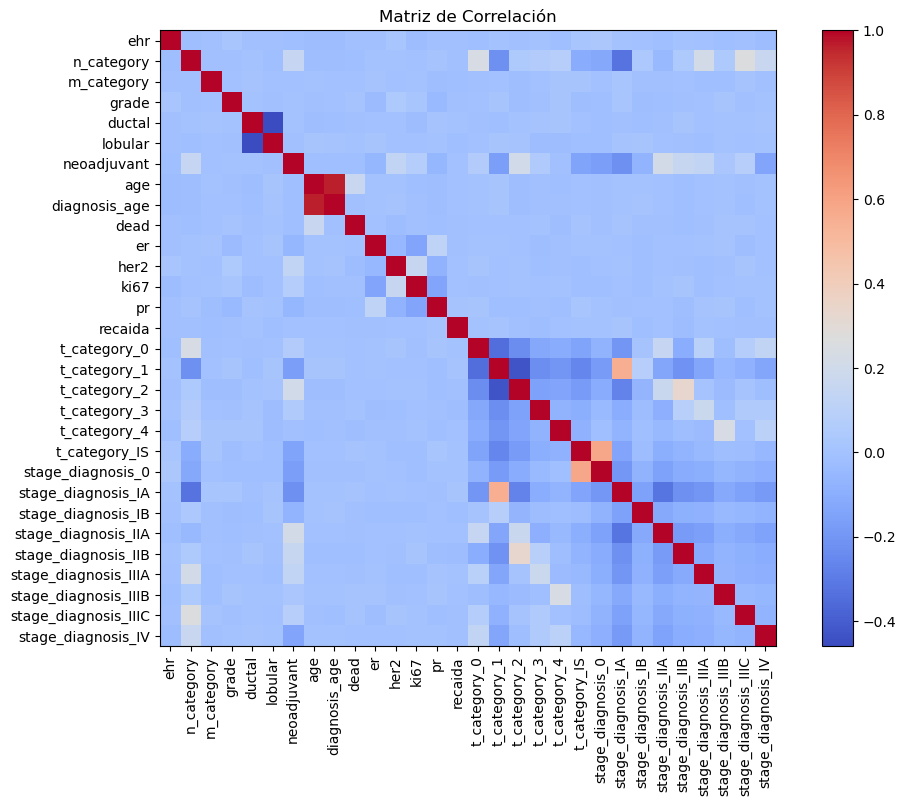

Columnas a eliminar:
{'diagnosis_age'}
Columnas eliminada


In [168]:
import pandas as pd
from sklearn.model_selection import train_test_split
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
import matplotlib.pyplot as plt

# Cargar tu dataset
# Asumo que ya tienes las variables X e y definidas


# Calcular la matriz de correlación
matriz_correlacion = tumor_patients_recaida.corr()

# Visualizar la matriz de correlación
plt.figure(figsize=(12, 8))
plt.imshow(matriz_correlacion, cmap='coolwarm', interpolation='none')
plt.colorbar()
plt.xticks(range(len(matriz_correlacion.columns)), matriz_correlacion.columns, rotation=90)
plt.yticks(range(len(matriz_correlacion.columns)), matriz_correlacion.columns)
plt.title("Matriz de Correlación")
plt.show()

# Eliminar las variables con correlación mayor al 80%
umbral_correlacion = 0.8
columnas_a_eliminar = set()

for i in range(len(matriz_correlacion.columns)):
    for j in range(i):
        if abs(matriz_correlacion.iloc[i, j]) > umbral_correlacion:
            columna = matriz_correlacion.columns[i]
            columnas_a_eliminar.add(columna)

print("Columnas a eliminar:")
print(columnas_a_eliminar)

# Eliminar las columnas con alta correlación
tumor_patients_recaida = tumor_patients_recaida.drop(columns=columnas_a_eliminar, inplace=True)

# Imprimir las columnas eliminadas
print("Columnas eliminadas")

MODELO PREDICCIÓN RECAIDA 

In [169]:
# Importar las bibliotecas necesarias
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix
import pandas as pd
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Cargar el dataset
# Asumiendo que tumor_patients_recaida es tu DataFrame
# Asegúrate de tener tus columnas de características (X) y la columna objetivo (y)
X = tumor_patients_recaida.drop('recaida', axis=1)
y = tumor_patients_recaida['recaida']

# Dividir el dataset en conjunto de entrenamiento, test y validación
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.2, random_state=42)
X_test, X_val, y_test, y_val = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)



modelo_naive_bayes = GaussianNB()
modelo_naive_bayes.fit(X_train, y_train)

# Evaluar el modelo en el conjunto de validación
y_pred = modelo_naive_bayes.predict(X_test)


# Calcular el accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

# Calcular la precision
precision = precision_score(y_test, y_pred)
print(f"Precision: {precision:.2f}")

# Calcular el recall
recall = recall_score(y_test, y_pred)
print(f"Recall: {recall:.2f}")

# Calcular el F1-score
f1 = f1_score(y_test, y_pred)
print(f"F1-score: {f1:.2f}")

# Crear y mostrar la matriz de confusión
matriz_confusion = confusion_matrix(y_test, y_pred)
print("Matriz de Confusión:")
print(matriz_confusion)


modelo_naive_bayes = GaussianNB()
modelo_naive_bayes.fit(X_train, y_train)

Accuracy: 0.90
Precision: 0.90
Recall: 1.00
F1-score: 0.95
Matriz de Confusión:
[[  0  98]
 [  0 850]]


GaussianNB()

In [170]:
# Importar las bibliotecas necesarias
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix
import pandas as pd

# Cargar el dataset
# Asumiendo que tumor_patients_recaida es tu DataFrame
# Asegúrate de tener tus columnas de características (X) y la columna objetivo (y)
# Ejemplo: X = tumor_patients_recaida.drop('columna_objetivo', axis=1)
#          y = tumor_patients_recaida['columna_objetivo']

# Dividir el dataset en conjunto de entrenamiento, test y validación
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.2, random_state=42)
X_test, X_val, y_test, y_val = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

# Inicializar y entrenar el modelo de árbol de decisiones
modelo_arbol = DecisionTreeClassifier(random_state=42, class_weight='balanced')
modelo_arbol.fit(X_train, y_train)

# Predecir con el conjunto de validación
y_pred = modelo_arbol.predict(X_test)

# Crear y mostrar la matriz de confusión
matriz_confusion = confusion_matrix(y_test, y_pred)
print("Matriz de Confusión:")
print(matriz_confusion)

# Calcular y mostrar métricas adicionales
accuracy_mejor_modelo = accuracy_score(y_test, y_pred)
precision_mejor_modelo = precision_score(y_test, y_pred)
recall_mejor_modelo = recall_score(y_test, y_pred)
f1_mejor_modelo = f1_score(y_test, y_pred)

print(f"Accuracy : {accuracy_mejor_modelo:.2f}")
print(f"Precision : {precision_mejor_modelo:.2f}")
print(f"Recall : {recall_mejor_modelo:.2f}")
print(f"F1-score : {f1_mejor_modelo:.2f}")



Matriz de Confusión:
[[ 16  82]
 [109 741]]
Accuracy : 0.80
Precision : 0.90
Recall : 0.87
F1-score : 0.89


In [171]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, f1_score

# Definir los hiperparámetros a ajustar
parametros_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Inicializar el modelo RandomForest con class_weight
modelo_forest = RandomForestClassifier(random_state=42, class_weight='balanced')

# Configurar la Grid Search con validación cruzada
grid_search = GridSearchCV(estimator=modelo_forest, param_grid=parametros_grid, cv=5, scoring='recall')

# Realizar la búsqueda de hiperparámetros en el conjunto de entrenamiento
grid_search.fit(X_train, y_train)

# Obtener los mejores hiperparámetros
mejores_parametros = grid_search.best_params_
print("Mejores hiperparámetros:", mejores_parametros)

# Obtener el modelo con los mejores hiperparámetros
mejor_modelo_forest = grid_search.best_estimator_

# Evaluar el modelo en el conjunto de validación
y_pred_mejor_modelo = mejor_modelo_forest.predict(X_val)

# Crear y mostrar la matriz de confusión
matriz_confusion_mejor_modelo = confusion_matrix(y_val, y_pred_mejor_modelo)
print("Matriz de Confusión (Mejor Modelo Random Forest):")
print(matriz_confusion_mejor_modelo)

# Calcular y mostrar métricas adicionales
accuracy_mejor_modelo = accuracy_score(y_val, y_pred_mejor_modelo)
precision_mejor_modelo = precision_score(y_val, y_pred_mejor_modelo)
recall_mejor_modelo = recall_score(y_val, y_pred_mejor_modelo)
f1_mejor_modelo = f1_score(y_val, y_pred_mejor_modelo)

print(f"Accuracy (Mejor Modelo Random Forest): {accuracy_mejor_modelo:.2f}")
print(f"Precision (Mejor Modelo Random Forest): {precision_mejor_modelo:.2f}")
print(f"Recall (Mejor Modelo Random Forest): {recall_mejor_modelo:.2f}")
print(f"F1-score (Mejor Modelo Random Forest): {f1_mejor_modelo:.2f}")
